In [1]:
import uproot as u
import numpy as np
import pyhf
import matplotlib.pyplot as plt 

In [2]:
# Open ROOT files

uncertainty = 0.3
nominal_eps = 1e-3 
obs_eps = []
exp_eps = []
scaling_list = [] 
scaling = 0.1
dm_type = "fermion"
alpha = 1.0
tag = "CNN"


base_dir_run1 = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_samples/"
base_dir_run3 = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_samples/"

signal_run1 = u.open(base_dir_run1 + dm_type + "_signal_hist_run1_" + tag + ".root")
signal_run3 = u.open(base_dir_run3 + dm_type + "_signal_hist_run3_" + tag + ".root")

bkg_run1 = u.open(base_dir_run1 + "background_hist_run1_" + tag + ".root")
bkg_run3 = u.open(base_dir_run3 + "background_hist_run3_" + tag + ".root")

In [3]:
masses = ["0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.10"]

print("Background events run1: {nevts:.2f}".format( nevts= np.sum(bkg_run1["background_hist"].values())))
print("Background events run3: {nevts:.2f}".format( nevts= np.sum(bkg_run3["background_hist"].values())))    

Background events run1: 59.72
Background events run3: 129.36


In [4]:
total_bkg = np.sum(bkg_run1["background_hist"].values()) + np.sum(bkg_run3["background_hist"].values())

total_run1 = np.sum(bkg_run1["background_hist"].values())
total_run3 = np.sum(bkg_run3["background_hist"].values())

n_back = bkg_run1["background_hist"].values().tolist()
n_back.extend(bkg_run3["background_hist"].values().tolist())

back_sigma =  (bkg_run1["background_hist"].values()*uncertainty).tolist()
back_sigma.extend((bkg_run3["background_hist"].values()*uncertainty).tolist())  
    
if alpha == 1.0:
    scaling_a1 = (1./pow(0.1,3))
else:
    scaling_a1 = 1. 

for mass in masses:
    print("Processing mass: " + mass)
    print("Signal events run1: {nevts:.2f}".format( nevts= np.sum(signal_run1["signal_"+ mass].values()*scaling_a1)))
    print("Signal events run3: {nevts:.2f}".format( nevts= np.sum(signal_run3["signal_"+ mass].values()*scaling_a1)))
    
    total_sig = np.sum(signal_run1["signal_"+mass].values()*scaling_a1) + np.sum(signal_run3["signal_"+mass].values()*scaling_a1)
    total_sig_run1 = np.sum(signal_run1["signal_"+mass].values()*scaling_a1)
    total_sig_run3 =  np.sum(signal_run3["signal_"+mass].values()*scaling_a1)
    factor = scaling*(((total_run1/total_sig_run1)+ (total_run3/total_sig_run3))/2.)
    total_sig_adjusted = np.sum(signal_run1["signal_"+mass].values()*scaling_a1*factor) + np.sum(signal_run3["signal_"+mass].values()*scaling_a1*factor)
    scaling_list.append(factor)
    
    
    # scaling signal, to have a reasonable signal strength between 0 and 10
    n_sig_run1 = (signal_run1["signal_"+mass].values()*scaling_a1*factor).tolist()
    n_sig_run3 = (signal_run3["signal_"+mass].values()*scaling_a1*factor).tolist()
    n_sig_run1.extend(n_sig_run3)

  

    model=pyhf.simplemodels.uncorrelated_background(
        signal=n_sig_run1, bkg=n_back,
        bkg_uncertainty=back_sigma)
    
    obs = n_back + model.config.auxdata
    
    poi_values = np.linspace(0., 10., 100)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
        obs, model, poi_values, level=0.1, return_results=True)
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    obs_epsilon = (nominal_eps**2)*np.sqrt(obs_limit*factor)
    exp_epsilon = (nominal_eps**2)*np.sqrt(exp_limits[2]*factor)
    exp_eps.append(exp_epsilon)
    print(f"Upper limit (obs): epsilon2 = {obs_epsilon}")
    print(f"Upper limit (exp): epsilon2 = {exp_epsilon}")
    print("\n")

Processing mass: 0.01
Signal events run1: 61111.09
Signal events run3: 153007.47


/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


Upper limit (obs): μ = 0.5117
Upper limit (exp): μ = 0.5117
Upper limit (obs): epsilon2 = 6.8292327945061915e-09
Upper limit (exp): epsilon2 = 6.8292327945061915e-09


Processing mass: 0.02
Signal events run1: 5680.87
Signal events run3: 14186.37
Upper limit (obs): μ = 0.5178
Upper limit (exp): μ = 0.5178
Upper limit (obs): epsilon2 = 2.2545628583892113e-08
Upper limit (exp): epsilon2 = 2.2545628583892113e-08


Processing mass: 0.03
Signal events run1: 1020.82
Signal events run3: 2542.79
Upper limit (obs): μ = 0.5280
Upper limit (exp): μ = 0.5280
Upper limit (obs): epsilon2 = 5.373607244408957e-08
Upper limit (exp): epsilon2 = 5.373607244408957e-08


Processing mass: 0.04
Signal events run1: 251.66
Signal events run3: 630.69
Upper limit (obs): μ = 0.5352
Upper limit (exp): μ = 0.5352
Upper limit (obs): epsilon2 = 1.0880869302658449e-07
Upper limit (exp): epsilon2 = 1.0880869302658449e-07


Processing mass: 0.05
Signal events run1: 59.25
Signal events run3: 147.88
Upper limit (obs): μ =

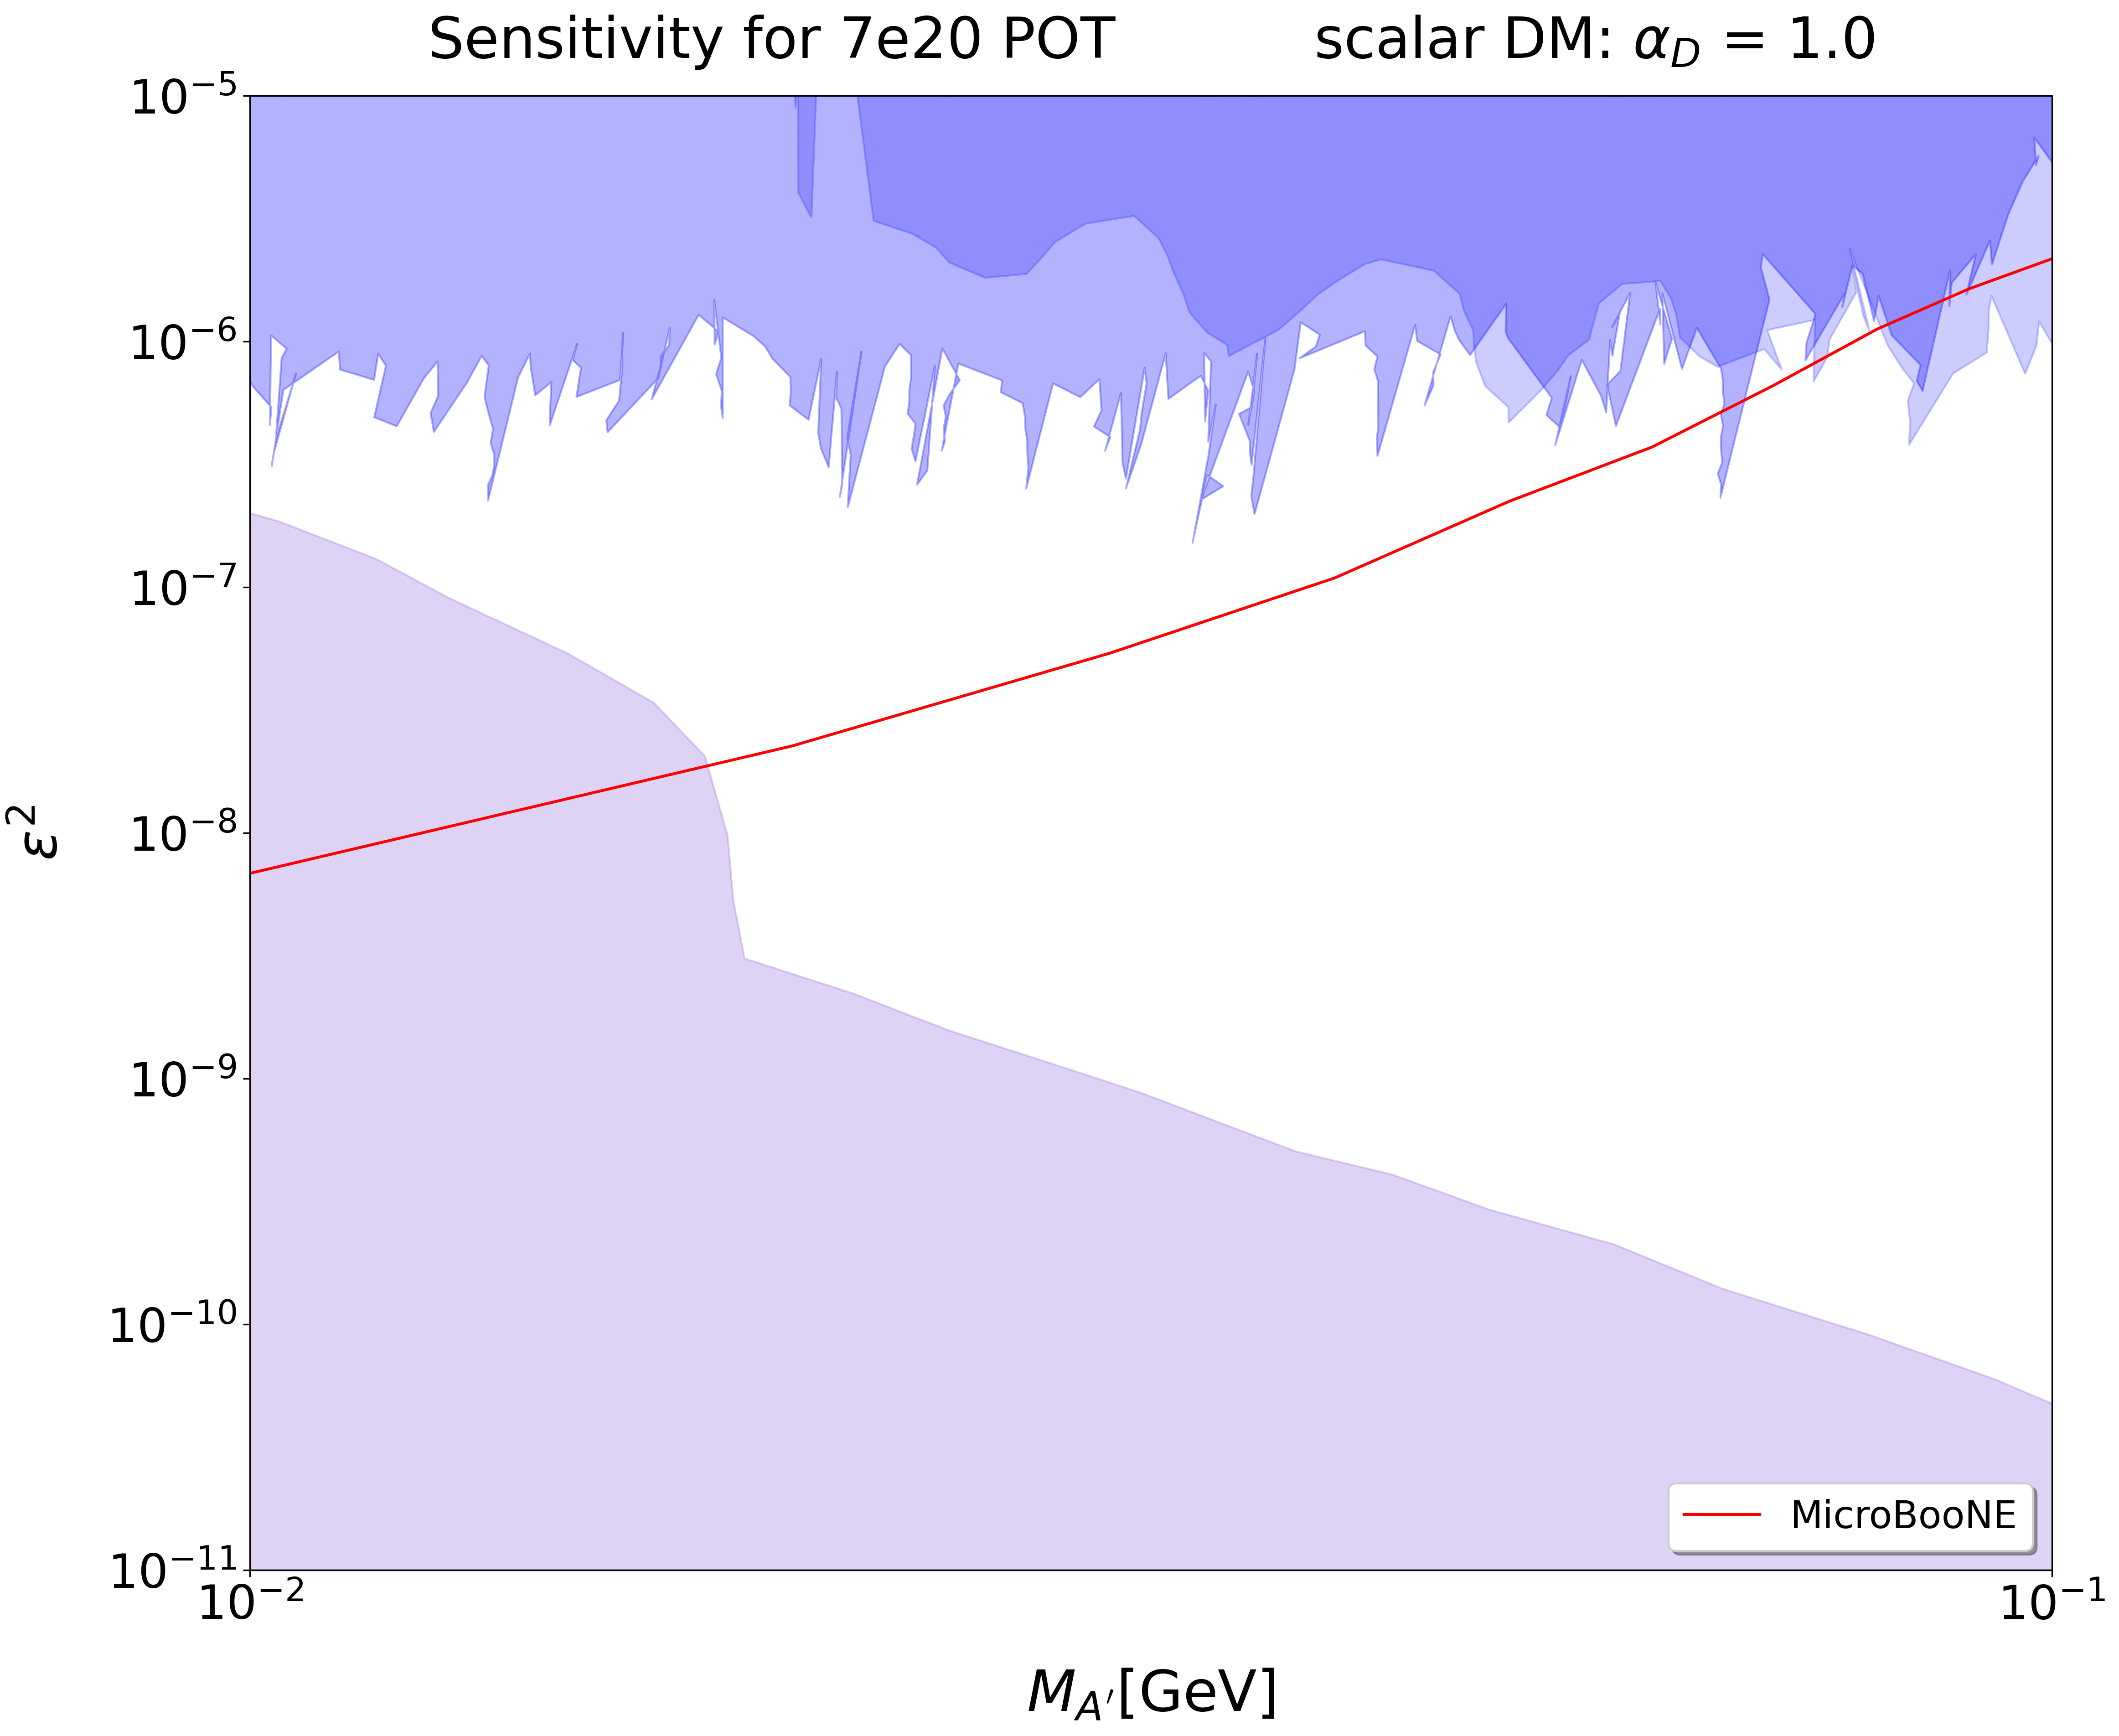

In [5]:
import pandas as pd
from matplotlib import patheffects

limits_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/"
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/sensitivity_plots/"
sensitivity_files = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/sensitivity_files/"

df = pd.read_csv(limits_dir + "dark_tridents_current_limits.csv")
df_b = pd.read_csv(limits_dir + "dark_tridents_current_limits_1.csv")
df_babar = pd.read_csv(limits_dir + "babar_paper.csv")
df_na = pd.read_csv(limits_dir + "NA48_2.csv")


dp_masses = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


plt.figure(figsize=(17,14),dpi=300)
plt.axis([ 1e-2, 1, 1e-11, 1e-5])
plt.plot(dp_masses,exp_eps,label=r'MicroBooNE',color='red')



if(dm_type == 'fermion' and alpha == 0.1):
    plt.plot(df['X_LSND'],df['Y_LSND'],'-', label=r'LSND',color='green')
    plt.fill_between(df['X_LSND'],df['Y_LSND'], 1e-5,color='green',alpha=0.2)
    plt.plot(df['X_PLANCK'],df['Y_PLANCK'],'-',color='orange', path_effects=[patheffects.withTickedStroke(spacing=10, angle=280)])
    plt.plot(df['X_PLANCK'],df['Y_PLANCK'],'-', label=r'Planck (fermionic DM)',color='orange')
elif(dm_type == 'fermion' and alpha == 1.):
    plt.plot(df_b['X_LSND'],df_b['Y_LSND'],'-', label=r'LSND',color='green')
    plt.fill_between(df_b['X_LSND'],df_b['Y_LSND'], 1e-5,color='green',alpha=0.2)
    plt.plot(df_b['X_PLANCK'],df_b['Y_PLANCK'],'-',color='orange', path_effects=[patheffects.withTickedStroke(spacing=10, angle=280)])
    plt.plot(df_b['X_PLANCK'],df_b['Y_PLANCK'],'-', label=r'Planck (fermionic DM)',color='orange')
else:
    pass
    
    
limit_dict = {'mass':dp_masses, 'epsilon_squared':exp_eps}
df_out = pd.DataFrame.from_dict(limit_dict)
#df_out.to_csv(sensitivity_files + dm_type + "_" + tag + "_sensitivity_alpha_" + str(alpha) + "_all_runs.csv")
 

#plt.plot(df['X_BD'],df['Y_BD'],'-', label=r'Beam Dump',color='mediumpurple')
plt.fill_between(df['X_BD'],df['Y_BD'],1e-11,color='mediumpurple',alpha=0.3)
#plt.plot(df_babar['X_babar'],np.square(df_babar['Y_babar']),'-', label=r'BaBar',color='blue')
plt.fill_between(df_babar['X_babar'],np.square(df_babar['Y_babar']), 1e-5,color='blue',alpha=0.2)
#plt.plot(df_na['X']*1e-3,df_na['Y'],'-', label=r'NA48/2',color='blue')
plt.fill_between(df_na['X']*1e-3,df_na['Y'], 1e-5,color='blue',alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-11,1e-5)
plt.xlim(1e-2,1e-1)
plt.legend(fontsize=20,loc="lower right",shadow=True)
plt.xticks(size=25)
plt.yticks(size=25)
plt.title("Sensitivity for 7e20 POT           " + dm_type + " DM: " + r'$\alpha_{D}$ = ' + str(alpha), size = 30, pad=20)
plt.xlabel(r'$M_{A^{\prime}}$[GeV]',size=30, labelpad=20)
plt.ylabel(r'$\epsilon^2$',size=30, labelpad=20)
plt.minorticks_off()
#plt.savefig(plots_dir + dm_type + "_" + tag + "_sensitivity_alpha_" + str(alpha) + ".png")